In [1]:
%load_ext autoreload
%autoreload 2

In [45]:
import numpy as np
from lab_helper import plot_boundaries, plot_boundaries_keras
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
from PlotCallback import PlotCallback
from multiclass_helper import draw_neural_net
from keras import backend as K

In [3]:
def generate_gaussians_distributions(sep=1, N=500, random_state=42, normalize=True):
    np.random.seed(random_state)
    # Zeros
    X1 = np.random.multivariate_normal(sep*np.array([0.5, 0.5]), [[0.1,-0.085],[-0.085,0.1]], N//2)
    # Ones
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    indexes = np.arange(len(y))
    np.random.shuffle(indexes)
    if normalize:
        X = (X - X.mean(axis=0))/X.std(axis=0)
    else:
        X[:, 0] = X[:, 0]
        X[:, 1] = X[:, 1]
    return X[indexes], y[indexes]

In [4]:
# Primero probar con N = 3000 para ver bien las distribuciones
X, y = generate_gaussians_distributions(sep=2, N = 500, normalize=False, random_state=41)

In [223]:
from sklearn.linear_model import SGDClassifier

In [245]:
clf = SGDClassifier(max_iter=5, tol=None, alpha=0, learning_rate='constant', eta0=0.1)

In [246]:
clf.fit(X, y)

/home/usuario/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0, average=False, class_weight=None, early_stopping=False,
       epsilon=0.1, eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='hinge', max_iter=5, n_iter=None,
       n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [247]:
clf.score(X, y)

1.0

In [344]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.regularizers import l2

In [353]:
model = Sequential()
# Que pasa si no pongo la función de activación??!
model.add(Dense(1, input_shape=(2,), kernel_regularizer=l2() ,activation='linear'))
model.compile(SGD(lr=1), loss='hinge', metrics=['accuracy'])

In [359]:
model.fit(X, y, epochs=10, verbose=1, batch_size=100)

Epoch 1/10
500/500 [==============================] - 0s 11us/step - loss: 0.5000 - acc: 0.0000e+00
Epoch 2/10
500/500 [==============================] - 0s 9us/step - loss: 0.5000 - acc: 0.0000e+00
Epoch 3/10
500/500 [==============================] - 0s 9us/step - loss: 0.5000 - acc: 0.0000e+00
Epoch 4/10
500/500 [==============================] - 0s 9us/step - loss: 0.5000 - acc: 0.0000e+00
Epoch 5/10
500/500 [==============================] - 0s 9us/step - loss: 0.5000 - acc: 0.0000e+00
Epoch 6/10
500/500 [==============================] - 0s 9us/step - loss: 0.5000 - acc: 0.0000e+00
Epoch 7/10
500/500 [==============================] - 0s 9us/step - loss: 0.5000 - acc: 0.0000e+00
Epoch 8/10
500/500 [==============================] - 0s 9us/step - loss: 0.5000 - acc: 0.0000e+00
Epoch 9/10
500/500 [==============================] - 0s 9us/step - loss: 0.5000 - acc: 0.0000e+00
Epoch 10/10
500/500 [==============================] - 0s 9us/step - loss: 0.5000 - acc: 0.0000e+00


500/500 [==============================] - 0s 369us/step
(41820, 1)


/home/usuario/anaconda3/envs/gpu/lib/python3.6/site-packages/keras/engine/sequential.py:247: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


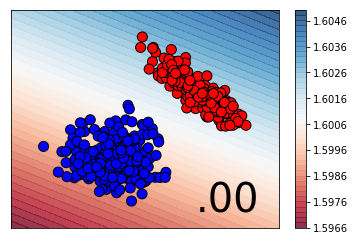

In [360]:
plot_boundaries_keras(X, y, model.evaluate(X,y)[1], probability_func=model.predict_proba)

In [43]:
model.predict_proba(X)

/home/usuario/anaconda3/envs/gpu/lib/python3.6/site-packages/keras/engine/sequential.py:247: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


array([[ 1.10341763e+00],
       [ 1.08611822e-01],
       [-1.30146861e-01],
       [ 1.11742675e-01],
       [-3.50824594e-02],
       [ 5.75911701e-01],
       [ 9.80150700e-02],
       [ 3.27503681e-03],
       [ 1.04613841e+00],
       [ 1.77998424e-01],
       [ 2.71089077e-02],
       [ 9.19501960e-01],
       [ 1.01184821e+00],
       [-1.85853243e-02],
       [-9.82117653e-03],
       [ 5.30494452e-02],
       [ 8.67302716e-01],
       [ 9.00723636e-01],
       [ 7.01835513e-01],
       [ 3.14083695e-02],
       [ 8.27784479e-01],
       [ 4.89976406e-02],
       [ 1.10982347e+00],
       [ 8.96072865e-01],
       [-2.50515938e-02],
       [ 9.73293066e-01],
       [ 5.53906560e-01],
       [ 5.70252538e-02],
       [ 5.78999400e-01],
       [ 7.59464383e-01],
       [ 8.39865327e-01],
       [ 1.16267836e+00],
       [ 1.10397160e-01],
       [ 7.04849958e-02],
       [ 4.47118282e-03],
       [ 8.00363362e-01],
       [ 1.67365670e-02],
       [ 8.95477355e-01],
       [ 5.8